### Louis-Antoine LeBel
#### ID: 40175005
#### COMP 333
#### Lab Assignment 1

#### Task Description
The purpose of this assignment is to recreate the four graphs on the "Exploratory data analysis" Wikipedia page.
#
The input is "tips.csv" which contains 244 rows of data on restaurant tipping.

In [44]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [45]:
data = pd.read_csv("tips.csv") # open csv file
tip_rate = data['tip'] / data['total_bill'] # calculate tip rate
data['tip_rate'] = tip_rate # add tip_rate column to data frame

print(data)

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size  tip_rate
0             1       16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1             2       10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2             3       21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3             4       23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4             5       24.59  3.61  Female     No   Sun  Dinner     4  0.146808
..          ...         ...   ...     ...    ...   ...     ...   ...       ...
239         240       29.03  5.92    Male     No   Sat  Dinner     3  0.203927
240         241       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
241         242       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222
242         243       17.82  1.75    Male     No   Sat  Dinner     2  0.098204
243         244       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 9 columns]


The above contains ten sample rows from "tips.csv".
Here is a description of each feature:

-   'Unnamed': id (starting at 1), nominal variable
-    total_bill: total amount paid by customer, ratio variable
-    tip: amount tipped by the customer, ratio variable
-    sex: sex of the customer, nominal variable
-    smoker: whether the customer is a smoker or not, nominal variable
-    day: Day of the week the customer ate, nominal variable
-    time: Time of the day the customer ate, nominal variable
-    size: number of customers at the table, ratio variable
-    tip_rate: percentage of the total bill that was a tip, ratio variable

#### Histograms

In [46]:
# function to create histogram based on interval

def hist_tips(x, interval):
    plt.grid(zorder = 0) #add grid
    bins_number = int(int(x.max()) / interval) # determine number of bins

    # find range of histogram so that the bins are centered on increment values
    range_min = x.min() - interval/2 +0.01
    range_max = x.max() + interval/2

    width_bin =  0.9 if interval > 0.5 else 0.5 # bin width based on interval value

    # plot histogram
    plt.hist(x, bins = bins_number, rwidth=width_bin, range=(range_min, range_max), zorder=10)
    plt.xlabel("Tips")
    plt.ylabel("Count")
    plt.show()

#### First plot

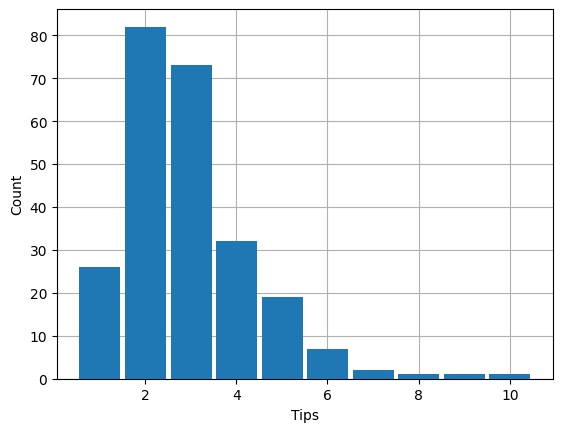

In [47]:
hist_tips(data["tip"], 1) # call histogram function with $1 interval

#### Second Plot

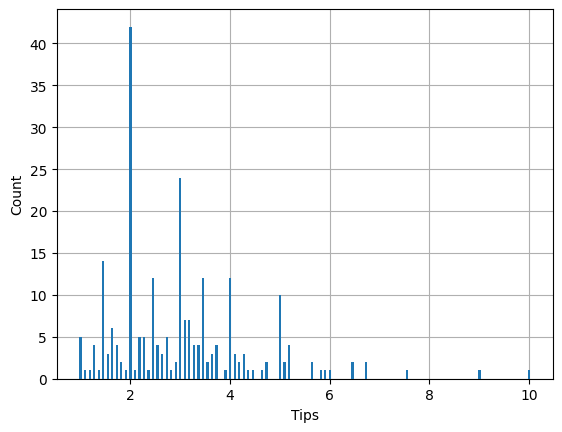

In [48]:
hist_tips(data["tip"], 0.1) # call histogram function with $0.1 interval

#### Scatter Plot

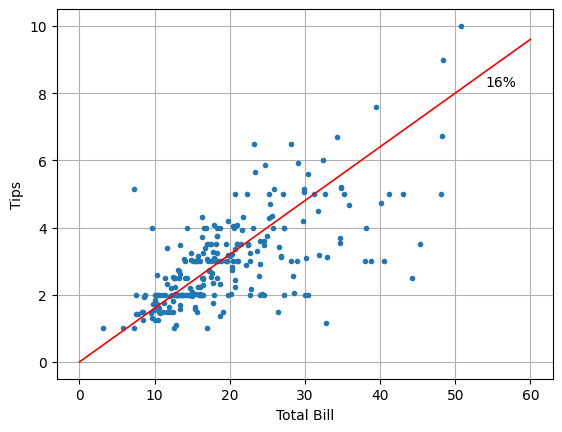

In [49]:
plt.grid(zorder = 0) # add grid
plt.scatter(data["total_bill"], data["tip"], s=9, zorder = 10) #plot scatter

# plot 'expected' tip rate (16%)
x = np.linspace(0,60,100)
y = 0.16*x
plt.plot(x, y, '-r', label='y=2x+1', linewidth = 1.2, zorder = 11)

# add text
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.annotate('16%', xy=(54,8.2), xycoords='data')

plt.show()

#### Scatterplots subplots

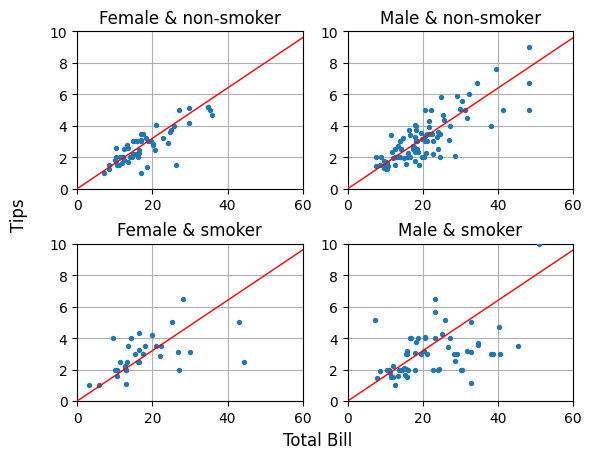

In [50]:
# filter data set on 'sex' and 'smoker' columns

fn = data.loc[(data['sex'] == 'Female') & (data['smoker'] == 'No')]
mn = data.loc[(data['sex'] == 'Male') & (data['smoker'] == 'No')]
fy = data.loc[(data['sex'] == 'Female') & (data['smoker'] == 'Yes')]
my = data.loc[(data['sex'] == 'Male') & (data['smoker'] == 'Yes')]

fig, ax = plt.subplots(nrows=2, ncols=2) # create subplots

fig.supxlabel("Total Bill")
fig.supylabel("Tips")

# add scatter plots to subplots
ax[0][0].scatter(fn["total_bill"], fn["tip"], s=8, zorder = 10)
ax[0][1].scatter(mn["total_bill"], mn["tip"], s=8, zorder = 10)
ax[1][0].scatter(fy["total_bill"], fy["tip"], s=8, zorder = 10)
ax[1][1].scatter(my["total_bill"], my["tip"], s=8, zorder = 10)

ax[0][0].set_title('Female & non-smoker')
ax[0][1].set_title('Male & non-smoker')
ax[1][0].set_title('Female & smoker')
ax[1][1].set_title('Male & smoker')


# plot 'expected' tip rate to each subplot
for row in ax:
    for col in row:
        col.set_xlim(0,60)
        col.set_ylim(0,10)
        col.grid(zorder=0)
        col.plot(x, y, '-r', label='y=2x+1', linewidth=1, zorder = 11)


plt.subplots_adjust(hspace=0.35)
plt.show()